In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats

In [2]:
data=pd.read_csv('adult.csv',na_values='?',skipinitialspace=True)

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#eda

In [5]:
data.shape

(48842, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [9]:
# null values

In [10]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
data=data.dropna()

In [12]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [13]:
data.shape

(45222, 15)

In [14]:
data['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [15]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [16]:
data['income']=data['income'].map({'<=50K':0,'>50K':1})

In [17]:
data['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [18]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [19]:
data_num=data.drop(['educational-num','race','income'],axis=1)

In [20]:
data_num.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,Male,0,0,30,United-States


In [21]:
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [22]:
# dustribution

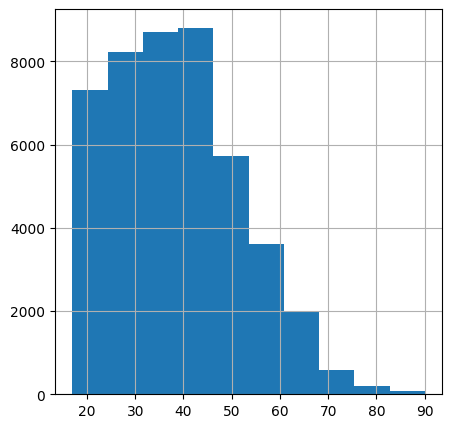

In [23]:
data['age'].hist(figsize=(5,5))
plt.show()

In [24]:
data[data['age']<70].shape

(44490, 15)

In [25]:
data[data['age']>70].shape

(636, 15)

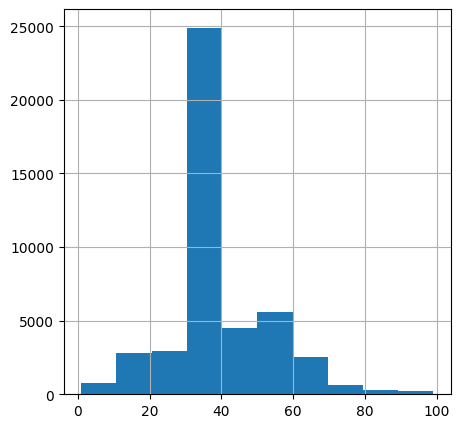

In [26]:
data['hours-per-week'].hist(figsize=(5,5))
plt.show()

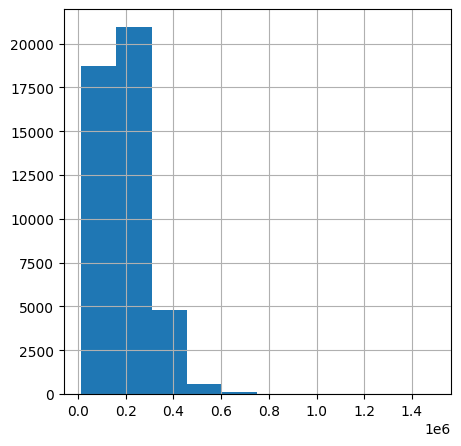

In [27]:
data['fnlwgt'].hist(figsize=(5,5))
plt.show()

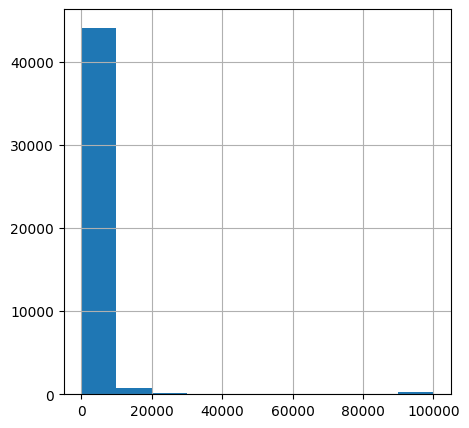

In [28]:
data['capital-gain'].hist(figsize=(5,5))
plt.show()

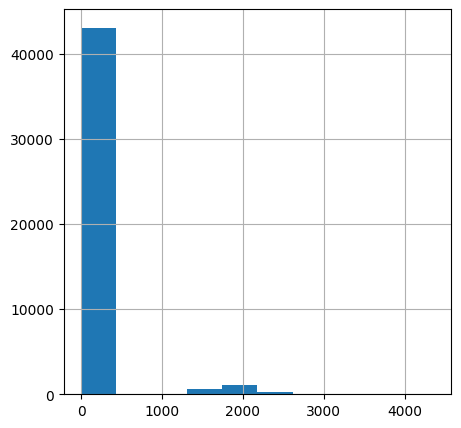

In [29]:
data['capital-loss'].hist(figsize=(5,5))
plt.show()

In [30]:
import seaborn as sns

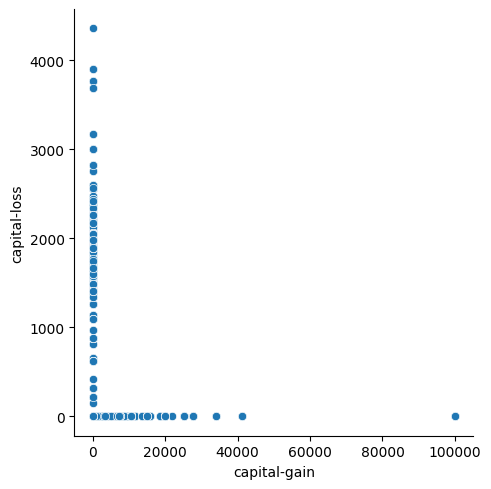

In [31]:
sns.relplot(x='capital-gain',y='capital-loss',data=data_num)

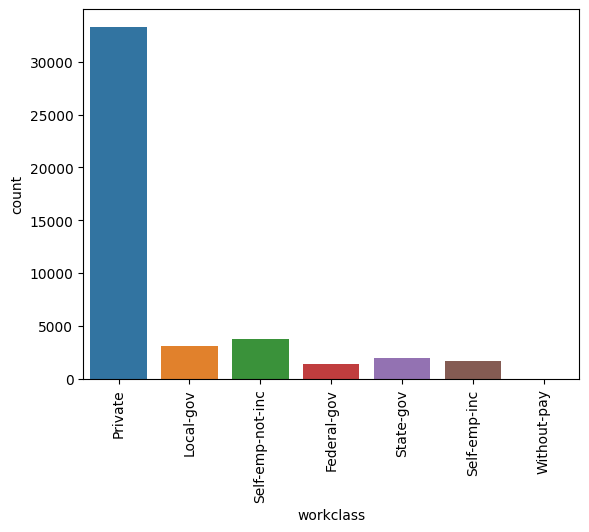

In [32]:
sns.countplot(x='workclass',data=data_num)
plt.xticks(rotation=90)
plt.show()

In [33]:
total=float(len(data['income']))
total

45222.0

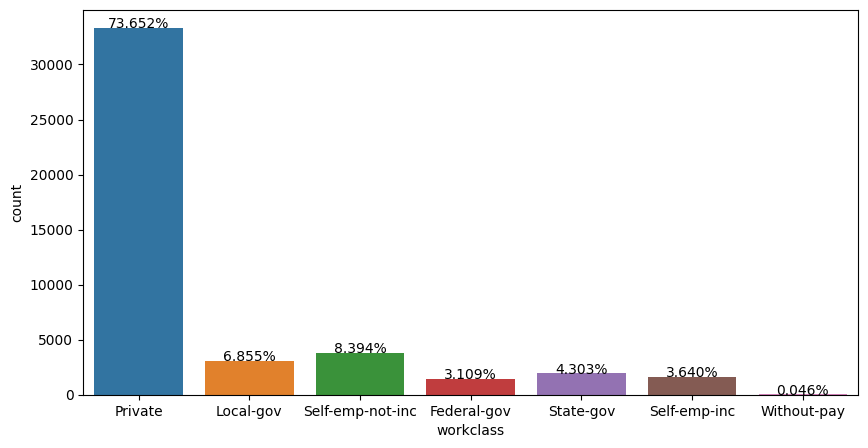

In [34]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='workclass',data=data)
total=float(len(data['income']))
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:0.3f}%'.format((height/total)*100), ha='center')
plt.show()

In [35]:
import plotly.graph_objects as go

In [36]:
data['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [37]:
x=data['workclass'].value_counts().keys().tolist()
x

['Private',
 'Self-emp-not-inc',
 'Local-gov',
 'State-gov',
 'Self-emp-inc',
 'Federal-gov',
 'Without-pay']

In [38]:
y=data['workclass'].value_counts().tolist()
y

[33307, 3796, 3100, 1946, 1646, 1406, 21]

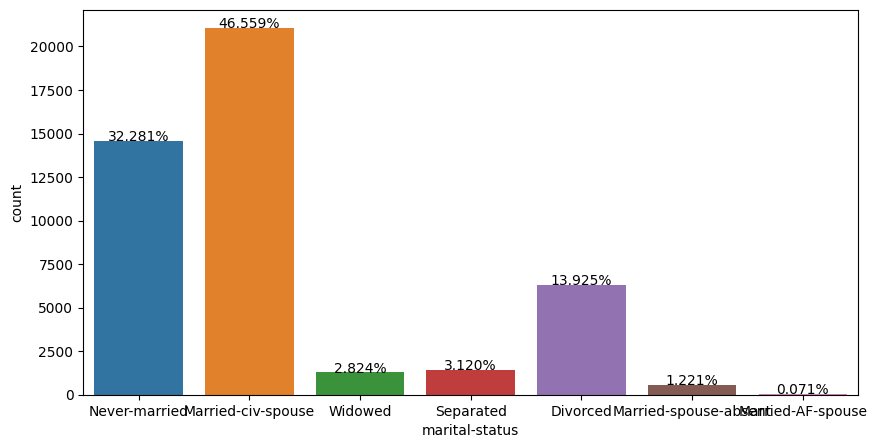

In [41]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='marital-status',data=data)
total=float(len(data['income']))
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:0.3f}%'.format((height/total)*100), ha='center')
plt.show()

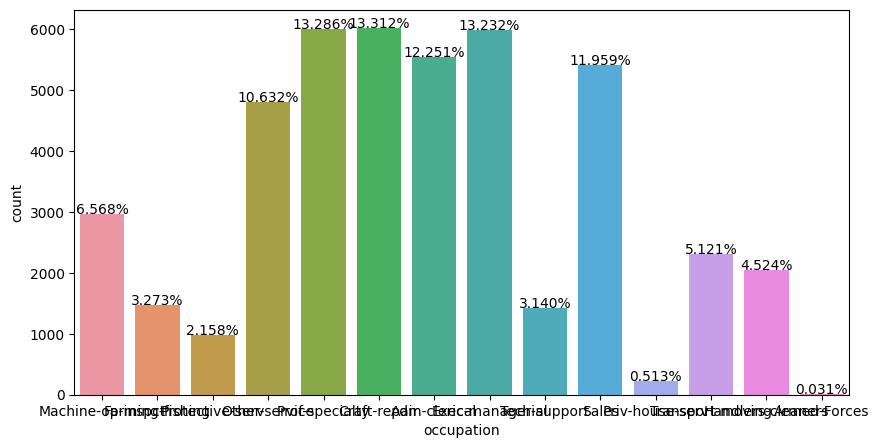

In [42]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='occupation',data=data)
total=float(len(data['income']))
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:0.3f}%'.format((height/total)*100), ha='center')
plt.show()

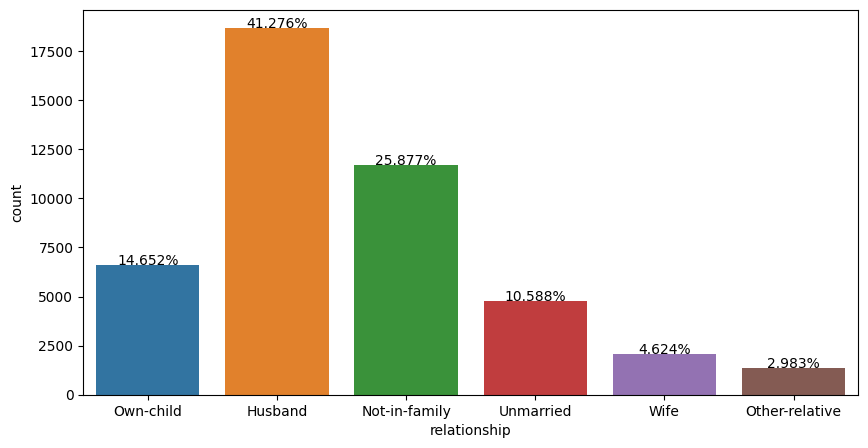

In [43]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='relationship',data=data)
total=float(len(data['income']))
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:0.3f}%'.format((height/total)*100), ha='center')
plt.show()

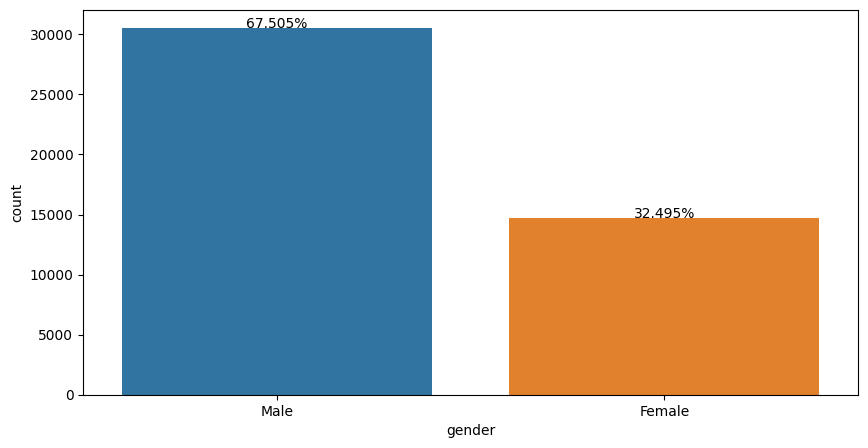

In [44]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='gender',data=data)
total=float(len(data['income']))
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:0.3f}%'.format((height/total)*100), ha='center')
plt.show()

In [45]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

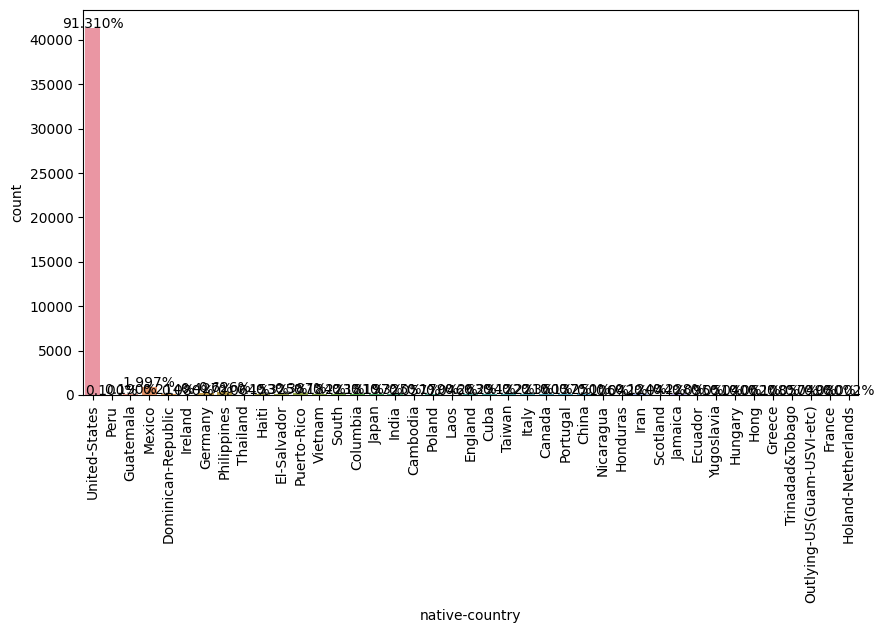

In [46]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='native-country',data=data)
total=float(len(data['income']))
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:0.3f}%'.format((height/total)*100), ha='center')
plt.xticks(rotation=90)
plt.show()

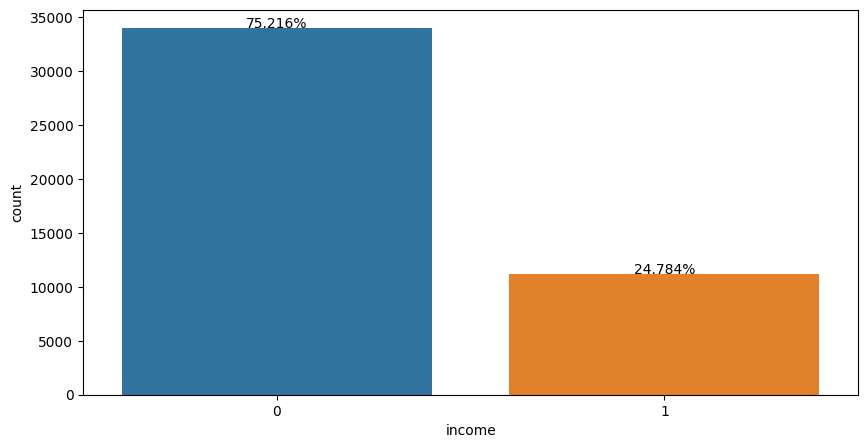

In [47]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='income',data=data)
total=float(len(data['income']))
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:0.3f}%'.format((height/total)*100), ha='center')
plt.show()

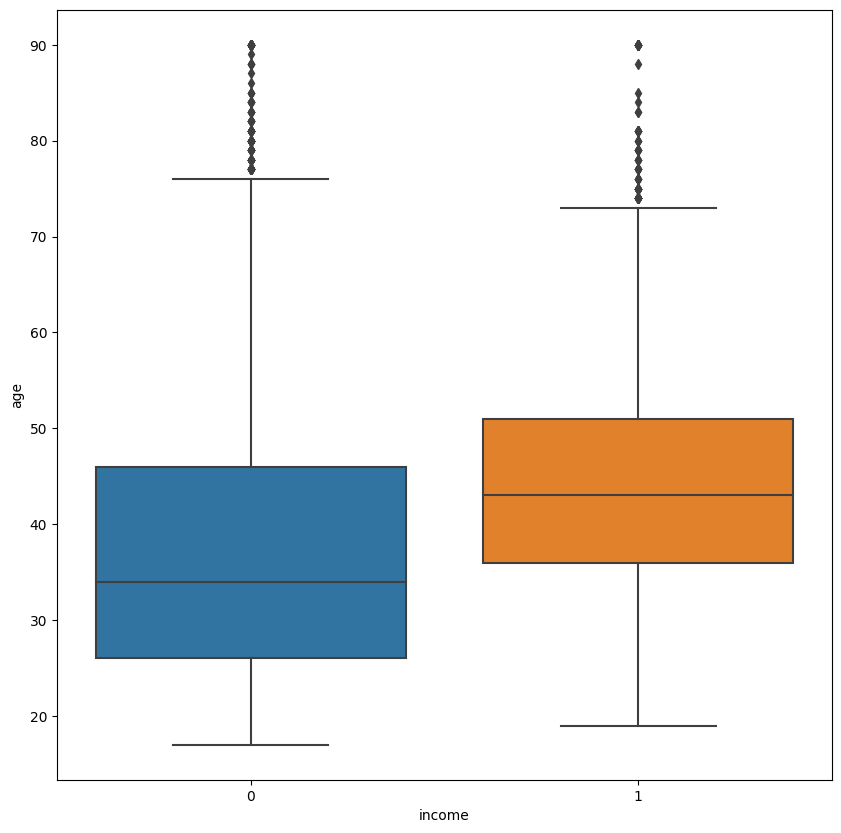

In [48]:
fig= plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='age',data=data)
plt.show()

In [49]:
data[['income','age']].groupby(['income'],as_index=False).mean().sort_values(by='age',ascending=False)

,income,age
1,1,44.006067
0,0,36.749427


In [50]:
# hypothesis test
#h0=there is no difference in mean age of income group <50k and >50
#alternative= is difference in mean age of income group <50k and >50

In [51]:
import random
data=data[(np.abs(stats.zscore(data['age']))<3)]
income_1=data[data['income']==1]['age']
income_0=data[data['income']==0]['age']


income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

In [52]:
from scipy.stats import ttest_ind

ttest,pval= ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p value',pval)

ttest 3.5700346828139504
p value 0.00045688681702362415


In [53]:
# reject null hypothesis

In [54]:
if pval<0.05:
  print(" reject null hypo")
else:
  print(" accept null hypo")

 reject null hypo


In [55]:
import random
data=data[(np.abs(stats.zscore(data['hours-per-week']))<3)]
income_1=data[data['income']==1]['hours-per-week']
income_0=data[data['income']==0]['hours-per-week']


income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

from scipy.stats import ttest_ind

ttest,pval= ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p value',pval)
if pval<0.05:
  print(" reject null hypo")
else:
  print(" accept null hypo")

ttest 4.840080434204638
p value 2.6133015806451137e-06
 reject null hypo


In [56]:
import random
data=data[(np.abs(stats.zscore(data['fnlwgt']))<3)]
income_1=data[data['income']==1]['fnlwgt']
income_0=data[data['income']==0]['fnlwgt']


income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

from scipy.stats import ttest_ind

ttest,pval= ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p value',pval)
if pval<0.05:
  print(" reject null hypo")
else:
  print(" accept null hypo")

ttest -0.326795239717344
p value 0.7441682177899902
 accept null hypo


In [57]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [58]:
import random
data=data[(np.abs(stats.zscore(data['capital-gain']))<3)]
income_1=data[data['income']==1]['capital-gain']
income_0=data[data['income']==0]['capital-gain']


income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

from scipy.stats import ttest_ind

ttest,pval= ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p value',pval)
if pval<0.05:
  print(" reject null hypo")
else:
  print(" accept null hypo")

ttest 4.369906988677293
p value 3.0136753483958875e-05
 reject null hypo


In [59]:
import random
data=data[(np.abs(stats.zscore(data['capital-loss']))<3)]
income_1=data[data['income']==1]['capital-loss']
income_0=data[data['income']==0]['capital-loss']


income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

from scipy.stats import ttest_ind

ttest,pval= ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p value',pval)
if pval<0.05:
  print(" reject null hypo")
else:
  print(" accept null hypo")

ttest -1.413102543813743
p value 0.1607619606870059
 accept null hypo


In [60]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [61]:
# contingency table
c = pd.crosstab(data['workclass'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False)


In [62]:
c

income,0,1
workclass,,
Federal-gov,1,3
Local-gov,5,4
Private,52,10
Self-emp-inc,1,1
Self-emp-not-inc,2,2
State-gov,2,0


In [63]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [64]:
stats,p,dof,expected=chi2_contingency(c)
print("degree of fredom: ",dof)
print("p value:",p)
print("expected: ",expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print(" probability =%.3f , critical=%.3f , stats=%.3f"%(prob,critical,stats))

if abs(stats)>=critical:
  print("accept null hypothesis")
else:
  print("accept alternative hypothesis")

degree of fredom:  5
p value: 0.026440588976881736
expected:  [[ 3.03614458  0.96385542]
 [ 6.8313253   2.1686747 ]
 [47.06024096 14.93975904]
 [ 1.51807229  0.48192771]
 [ 3.03614458  0.96385542]
 [ 1.51807229  0.48192771]]
 probability =0.950 , critical=11.070 , stats=12.692
accept null hypothesis


In [65]:
# contingency table
c = pd.crosstab(data['education'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False)
print(c)
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stats,p,dof,expected=chi2_contingency(c)
print("degree of fredom: ",dof)
print("p value:",p)
print("expected: ",expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print(" probability =%.3f , critical=%.3f , stats=%.3f"%(prob,critical,stats))

if abs(stats)>=critical:
  print("accept null hypothesis")
else:
  print("accept alternative hypothesis")

income         0  1
education          
10th           2  0
11th           6  0
12th           1  0
1st-4th        1  0
7th-8th        2  0
9th            1  0
Assoc-acdm     2  0
Assoc-voc      2  0
Bachelors     11  8
HS-grad       18  5
Masters        2  3
Some-college  15  4
degree of fredom:  11
p value: 0.33036057742482444
expected:  [[ 1.51807229  0.48192771]
 [ 4.55421687  1.44578313]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 1.51807229  0.48192771]
 [ 0.75903614  0.24096386]
 [ 1.51807229  0.48192771]
 [ 1.51807229  0.48192771]
 [14.42168675  4.57831325]
 [17.45783133  5.54216867]
 [ 3.79518072  1.20481928]
 [14.42168675  4.57831325]]
 probability =0.950 , critical=19.675 , stats=12.456
accept alternative hypothesis


there is no relationship

In [66]:
# contingency table
c = pd.crosstab(data['marital-status'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False)
print(c)
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stats,p,dof,expected=chi2_contingency(c)
print("degree of fredom: ",dof)
print("p value:",p)
print("expected: ",expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print(" probability =%.3f , critical=%.3f , stats=%.3f"%(prob,critical,stats))

if abs(stats)>=critical:
  print("accept null hypothesis")
else:
  print("accept alternative hypothesis")

income                  0   1
marital-status               
Divorced               10   0
Married-civ-spouse     16  19
Married-spouse-absent   2   0
Never-married          31   1
Separated               2   0
Widowed                 2   0
degree of fredom:  5
p value: 1.3381242979206064e-05
expected:  [[ 7.59036145  2.40963855]
 [26.56626506  8.43373494]
 [ 1.51807229  0.48192771]
 [24.28915663  7.71084337]
 [ 1.51807229  0.48192771]
 [ 1.51807229  0.48192771]]
 probability =0.950 , critical=11.070 , stats=30.215
accept null hypothesis


In [67]:
# contingency table
c = pd.crosstab(data['occupation'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False)
print(c)
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stats,p,dof,expected=chi2_contingency(c)
print("degree of fredom: ",dof)
print("p value:",p)
print("expected: ",expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print(" probability =%.3f , critical=%.3f , stats=%.3f"%(prob,critical,stats))

if abs(stats)>=critical:
  print("null hypo - no relationship")
else:
  print("alternative - relationship")

income              0  1
occupation              
Adm-clerical       10  2
Craft-repair       12  3
Exec-managerial     7  3
Farming-fishing     1  0
Handlers-cleaners   2  1
Machine-op-inspct   5  0
Other-service      10  0
Priv-house-serv     1  0
Prof-specialty      9  7
Protective-serv     1  0
Sales               3  0
Tech-support        0  3
Transport-moving    2  1
degree of fredom:  12
p value: 0.058769832973436215
expected:  [[ 9.10843373  2.89156627]
 [11.38554217  3.61445783]
 [ 7.59036145  2.40963855]
 [ 0.75903614  0.24096386]
 [ 2.27710843  0.72289157]
 [ 3.79518072  1.20481928]
 [ 7.59036145  2.40963855]
 [ 0.75903614  0.24096386]
 [12.14457831  3.85542169]
 [ 0.75903614  0.24096386]
 [ 2.27710843  0.72289157]
 [ 2.27710843  0.72289157]
 [ 2.27710843  0.72289157]]
 probability =0.950 , critical=21.026 , stats=20.466
alternative - relationship


In [68]:
# contingency table
c = pd.crosstab(data['relationship'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False)
print(c)
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stats,p,dof,expected=chi2_contingency(c)
print("degree of fredom: ",dof)
print("p value:",p)
print("expected: ",expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print(" probability =%.3f , critical=%.3f , stats=%.3f"%(prob,critical,stats))

if abs(stats)>=critical:
  print("null hypo - no relationship")
else:
  print("alternative - relationship")

income          0   1
relationship         
Husband        13  18
Not-in-family  24   1
Own-child      12   0
Unmarried      11   0
Wife            3   1
degree of fredom:  4
p value: 1.5996332099446223e-06
expected:  [[23.53012048  7.46987952]
 [18.97590361  6.02409639]
 [ 9.10843373  2.89156627]
 [ 8.34939759  2.65060241]
 [ 3.03614458  0.96385542]]
 probability =0.950 , critical=9.488 , stats=32.380
null hypo - no relationship


In [69]:
# contingency table
c = pd.crosstab(data['race'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False)
print(c)
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stats,p,dof,expected=chi2_contingency(c)
print("degree of fredom: ",dof)
print("p value:",p)
print("expected: ",expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print(" probability =%.3f , critical=%.3f , stats=%.3f"%(prob,critical,stats))

if abs(stats)>=critical:
  print("null hypo - no relationship")
else:
  print("alternative - relationship")

income               0   1
race                      
Asian-Pac-Islander   3   0
Black                4   0
Other                4   0
White               52  20
degree of fredom:  3
p value: 0.2587158953453994
expected:  [[ 2.27710843  0.72289157]
 [ 3.03614458  0.96385542]
 [ 3.03614458  0.96385542]
 [54.65060241 17.34939759]]
 probability =0.950 , critical=7.815 , stats=4.026
alternative - relationship


In [70]:
# contingency table
c = pd.crosstab(data['gender'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False)
print(c)
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stats,p,dof,expected=chi2_contingency(c)
print("degree of fredom: ",dof)
print("p value:",p)
print("expected: ",expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print(" probability =%.3f , critical=%.3f , stats=%.3f"%(prob,critical,stats))

if abs(stats)>=critical:
  print("null hypo - no relationship")
else:
  print("alternative - relationship")

income   0   1
gender        
Female  32   1
Male    31  19
degree of fredom:  1
p value: 0.0007155786092882721
expected:  [[25.04819277  7.95180723]
 [37.95180723 12.04819277]]
 probability =0.950 , critical=3.841 , stats=11.448
null hypo - no relationship


In [71]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [72]:
# contingency table
c = pd.crosstab(data['native-country'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False)
print(c)
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stats,p,dof,expected=chi2_contingency(c)
print("degree of fredom: ",dof)
print("p value:",p)
print("expected: ",expected)

prob=0.95
critical=chi2.ppf(prob,dof)
print(" probability =%.3f , critical=%.3f , stats=%.3f"%(prob,critical,stats))

if abs(stats)>=critical:
  print("null hypo - no relationship")
else:
  print("alternative - relationship")

income               0   1
native-country            
Dominican-Republic   2   0
England              1   0
Germany              1   0
India                1   0
Japan                1   0
Mexico               2   1
Philippines          1   0
Poland               1   0
Portugal             1   0
South                1   0
United-States       51  19
degree of fredom:  10
p value: 0.9610177856391237
expected:  [[ 1.51807229  0.48192771]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 2.27710843  0.72289157]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [ 0.75903614  0.24096386]
 [53.13253012 16.86746988]]
 probability =0.950 , critical=18.307 , stats=3.670
alternative - relationship


In [73]:
data_num.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,Male,0,0,30,United-States


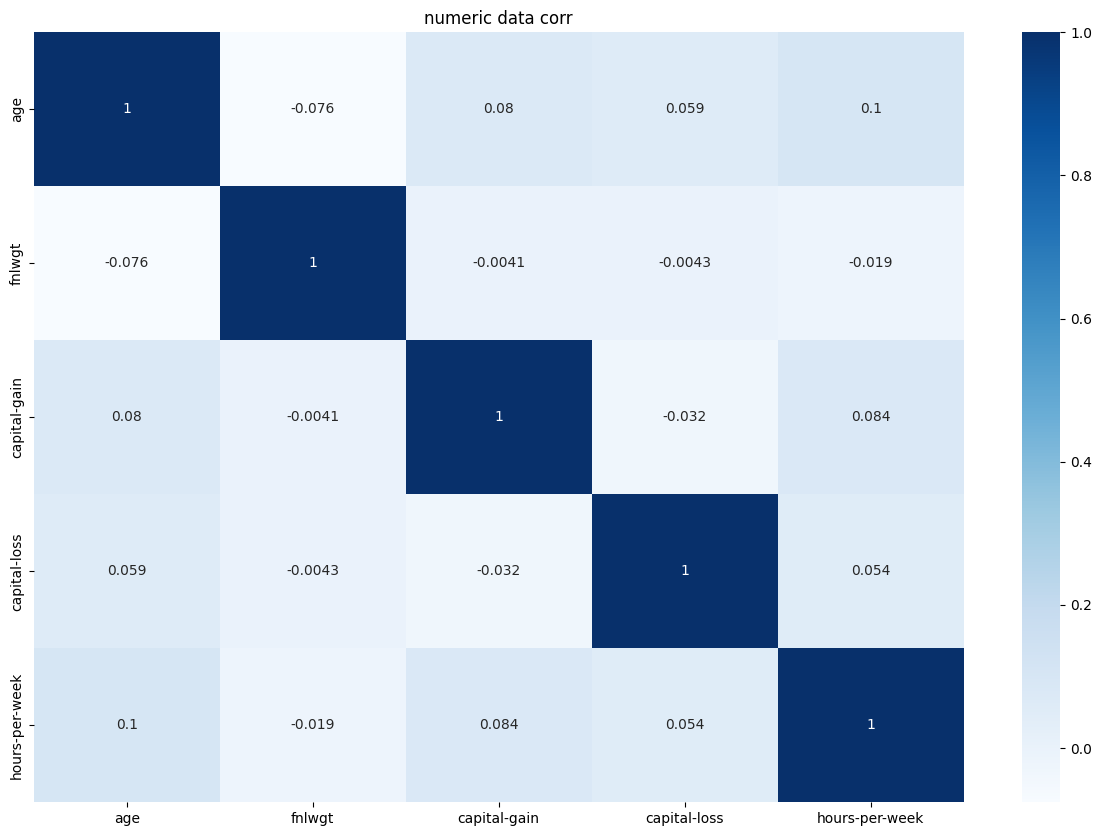

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(data_num.corr(),annot=True,cmap='Blues')
plt.title("numeric data corr")
plt.show()

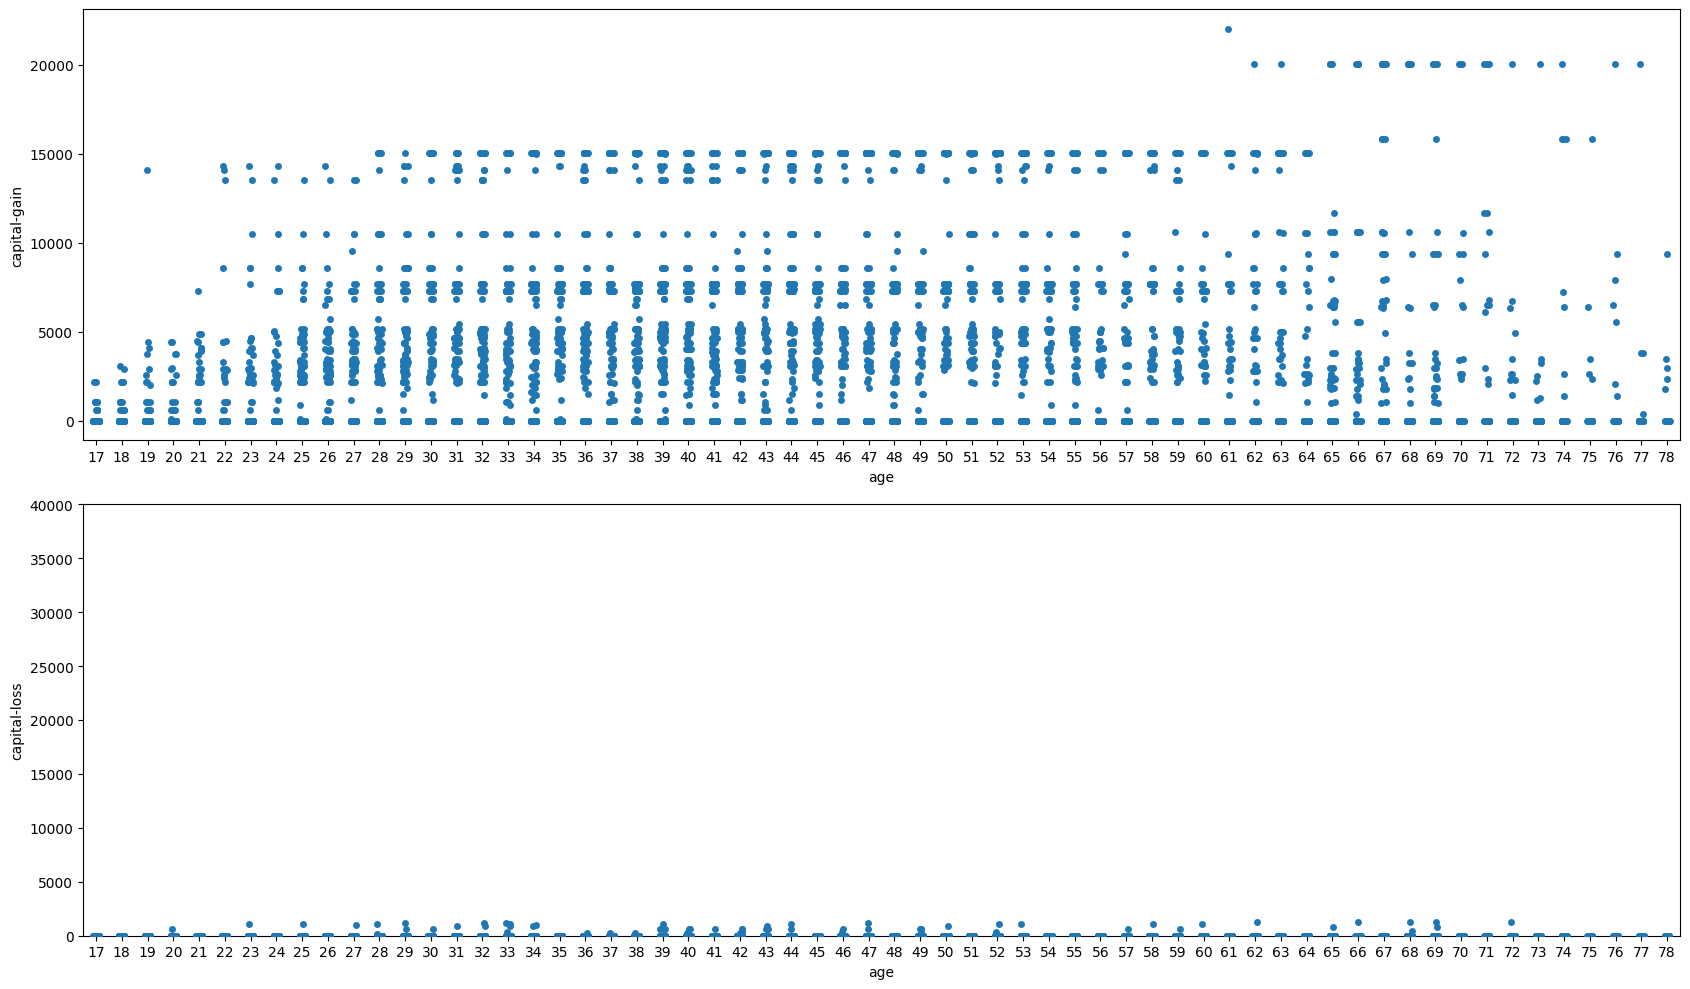

In [75]:
fig=plt.figure(figsize=(17,10))
ax1=fig.add_subplot(2,1,1)
sns.stripplot(x='age',y='capital-gain',data=data)


ax2=fig.add_subplot(2,1,2)
sns.stripplot(x='age',y='capital-loss',data=data)
ax2.set_ylim(0,40000)

plt.tight_layout()
plt.show()

In [76]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [77]:
data['capital-change']=data['capital-gain']-data['capital-loss']

In [78]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital-change
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,7688
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,0


<Axes: >

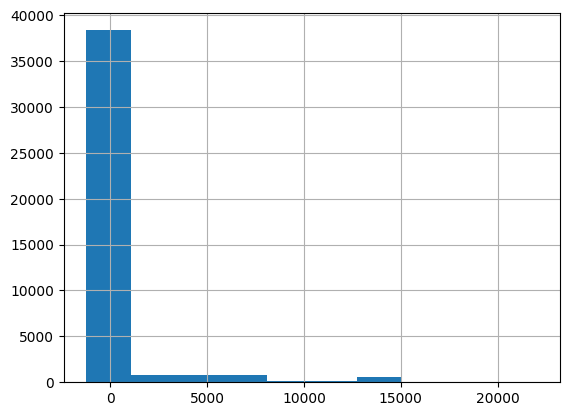

In [79]:
data['capital-change'].hist()

In [ ]:
income_1 = data[data['income']==1]["capital-change"]
income_0 = data[data['income']==0]["capital-change"]

data = data[(np.abs(stats.zscore(data["age"])) < 3)]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 50)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 50)

ttest,pval = ttest_ind(income_1,income_0, equal_var=0)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

In [85]:
data.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital-change
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0


In [86]:
data['marital-status'].value_counts()

Married-civ-spouse       18918
Never-married            13786
Divorced                  5896
Separated                 1332
Widowed                   1148
Married-spouse-absent      507
Married-AF-spouse           27
Name: marital-status, dtype: int64

In [87]:
data['gender']=data['gender'].map({'Male':0,'Female':1})
data['marital-status']=data['marital-status'].replace(['Never-married','Divorced','Separated','Widowed'],'Single')
data['marital-status']=data['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')

In [88]:
data['marital-status'].value_counts()

Single     22162
Married    19452
Name: marital-status, dtype: int64

In [89]:
data['marital-status']=data['marital-status'].map({'Single':0,'Married':1})


In [90]:
data['marital-status']=data['marital-status'].astype(int)


In [91]:
data.drop(labels=['workclass','education','occupation','relationship','race','native-country','capital-change'],axis=1,inplace=True)

In [92]:
data.head(2)

,age,fnlwgt,educational-num,marital-status,gender,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,0,0,40,0
1,38,89814,9,1,0,0,0,50,0


In [94]:
# include objet type data , LE , apply algorithms ----> 1
# chi square test (pick the necessary columns) , LE , apply algo --> 2

# you dont have to submit it is just for your knowledge

In [95]:
#model building

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [97]:
from sklearn.metrics import *


In [98]:
data.head()

,age,fnlwgt,educational-num,marital-status,gender,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,0,0,40,0
1,38,89814,9,1,0,0,0,50,0
2,28,336951,12,1,0,0,0,40,1
3,44,160323,10,1,0,7688,0,40,1
5,34,198693,6,0,0,0,0,30,0


In [100]:
x=data.iloc[:,:-1]
x

,age,fnlwgt,educational-num,marital-status,gender,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,0,0,40
1,38,89814,9,1,0,0,0,50
2,28,336951,12,1,0,0,0,40
3,44,160323,10,1,0,7688,0,40
5,34,198693,6,0,0,0,0,30
...,...,...,...,...,...,...,...,...
48837,27,257302,12,1,1,0,0,38
48838,40,154374,9,1,0,0,0,40
48839,58,151910,9,0,1,0,0,40
48840,22,201490,9,0,0,0,0,20


In [101]:
y=data["income"]
y

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 41614, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split


In [104]:
xtrain,xtest,ytrain,ytest=train_test_split( x, y, test_size=0.33, random_state=7)


In [106]:
num_trees=100
max_features=3

In [107]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees,max_features=max_features,random_state=11)))
models.append(('NB',GaussianNB()))

models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier(max_features=3, random_state=11)),
 ('NB', GaussianNB())]

In [108]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 82.7 MB/s eta 0:0

In [109]:
from pycaret.classification import *

In [110]:
c=setup(data=data , target='income')

,Description,Value
0,Session id,5197
1,Target,income
2,Target type,Binary
3,Original data shape,"(41614, 9)"
4,Transformed data shape,"(41614, 9)"
5,Transformed train set shape,"(29129, 9)"
6,Transformed test set shape,"(12485, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [111]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8553,0.9083,0.5720,0.7371,0.6439,0.5549,0.5621,0.7560
gbc,Gradient Boosting Classifier,0.8544,0.9057,0.5462,0.7498,0.6318,0.5438,0.5545,2.7310
xgboost,Extreme Gradient Boosting,0.8539,0.9054,0.5781,0.7275,0.6441,0.5537,0.5596,2.0920
ada,Ada Boost Classifier,0.8482,0.8996,0.5430,0.7252,0.6206,0.5281,0.5371,2.1790
lda,Linear Discriminant Analysis,0.8410,0.8870,0.5001,0.7195,0.5900,0.4953,0.5079,0.1280
ridge,Ridge Classifier,0.8372,0.0000,0.4174,0.7638,0.5396,0.4509,0.4814,0.1460
rf,Random Forest Classifier,0.8309,0.8738,0.5616,0.6512,0.6030,0.4963,0.4986,3.2550
et,Extra Trees Classifier,0.8247,0.8579,0.5594,0.6321,0.5933,0.4821,0.4837,3.0150
lr,Logistic Regression,0.8011,0.5909,0.1995,0.7427,0.3144,0.2409,0.3130,1.0110
dt,Decision Tree Classifier,0.7963,0.7148,0.5631,0.5539,0.5584,0.4260,0.4261,0.3270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5197, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [116]:
rf= RandomForestClassifier(n_estimators=100,max_features=5)

In [117]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [118]:
y_pred=rf.predict(xtest)

In [119]:
accuracy_score(ytest,y_pred)

0.828660889827423